In [139]:
# iqr = q3-q1
# lower_limit = q1 - 1.5*iqr
# upper_limit = q3 + 1.5*iqr

In [140]:
import pandas as pd

df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [141]:
q1, q3 = df["height"].quantile([0.25,0.75])
q1, q3

(5.3500000000000005, 6.275)

In [142]:
iqr = q3 - q1
iqr

0.9249999999999998

In [143]:
lower_limit = q1 - 1.5*iqr
lower_limit

3.962500000000001

In [144]:
upper_limit = q3 + 1.5*iqr
upper_limit

7.6625

In [145]:
df[ (df["height"] < lower_limit) | (df["height"] > upper_limit) ]

,name,height
0,mohan,1.2
19,Liu,40.2


In [146]:
# to remove outliers
df = df[ (df["height"] > lower_limit) & (df["height"] < upper_limit) ]

In [147]:
# we removed outliers, we can substitue them with the mean/median value , whatever appropriately as per domain expertise
# sometimes having outliers might be ok for better model or prediction , depends on context

In [148]:
# Box plot to treat outliers

In [149]:
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [150]:
df["Region"].unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [151]:
#for detecting outliers , we need different data as per region, bcoz sales range will be different for different regions

In [152]:
df_apac = df[df["Region"] == 'APAC']
df_europe = df[df["Region"] == 'Europe']
df_americas = df[df["Region"] == 'Americas']

In [153]:
def  get_lower_upper(data):
    q1, q3 = data["Sales"].quantile([0.25,0.75])
    iqr = q3 -q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return lower, upper

In [154]:
lower, upper = get_lower_upper(df_apac)
lower, upper

(-737.125, 59747.875)

In [155]:
df_apac["Sales"].describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [156]:
#the lower and upper values are within min and max of describe, hence no outlier
# min      18579.000000 > lower and max      38143.000000 < upper

In [157]:
lower, upper = get_lower_upper(df_europe)
lower, upper

(7306.875, 17665.875)

In [158]:
df_europe["Sales"].describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [159]:
# min       9665.000000 > lower, but max  23000.000000 > upper, hence outlier

In [160]:
df_europe[df_europe["Sales"] > upper]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [161]:
lower, upper = get_lower_upper(df_americas)
lower, upper

(16832.375, 38473.375)

In [162]:
df_americas["Sales"].describe()

count       12.000000
mean     28356.750000
std       3610.368556
min      23407.000000
25%      24947.750000
50%      28770.500000
75%      30358.000000
max      34102.000000
Name: Sales, dtype: float64

In [163]:
# min 23407.000000 > lower and max      34102.000000 = upper , hence no outliers

In [195]:
labels_x = df["Region"].unique()
labels_x

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [203]:
plot_data = [ df["Sales"][df["Region"] == label] for label in labels_x ]

In [205]:
plot_data

[0     36750
 1     36995
 2     18579
 3     37768
 4     23956
 5     38143
 6     29132
 7     21961
 8     33299
 9     37279
 10    21388
 11    21896
 Name: Sales, dtype: int64,
 12     9665
 13    10297
 14    11079
 15    13410
 16    11229
 17    15352
 18    13286
 19    11470
 20    11873
 21    23000
 22    12215
 23    14895
 Name: Sales, dtype: int64,
 24    30247
 25    29284
 26    27904
 27    23407
 28    23716
 29    25077
 30    33649
 31    24560
 32    34102
 33    28257
 34    30691
 35    29387
 Name: Sales, dtype: int64]

In [207]:
plot_data = [ df["Sales"][df["Region"] == label].values for label in labels_x ]

In [209]:
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_7492\1386010393.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels = labels_x, vert = True, patch_artist = True)


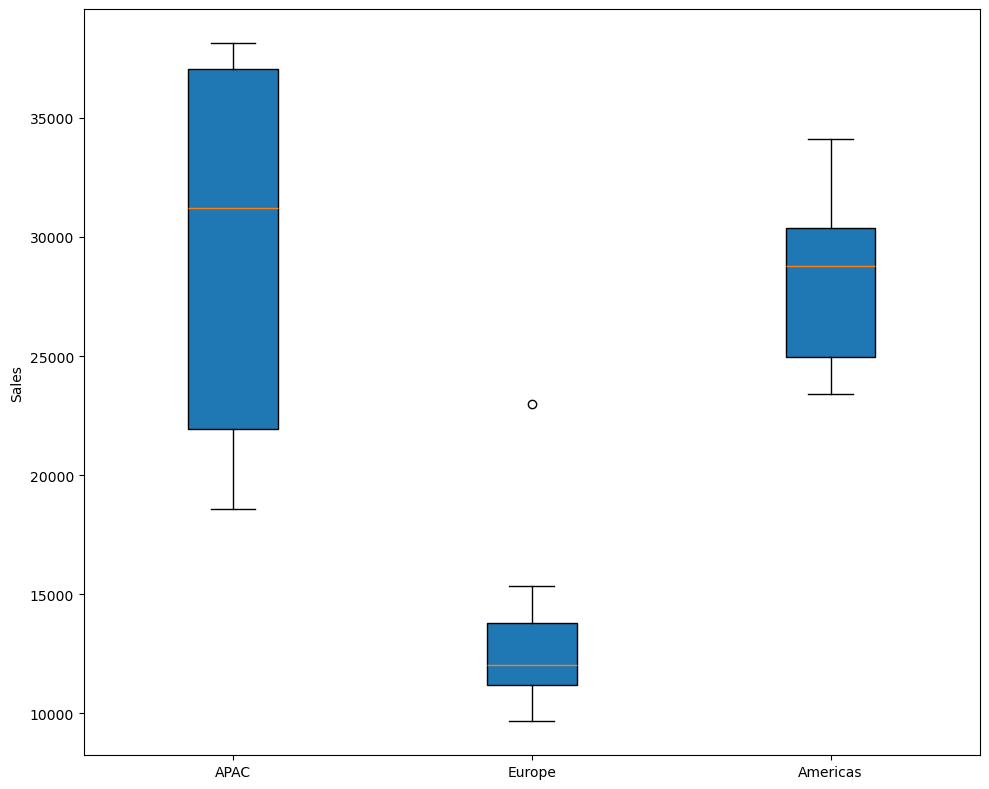

In [219]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.boxplot(plot_data, labels = labels_x, vert = True, patch_artist = True)
plt.ylabel("Sales")
plt.tight_layout()
plt.show()